# Thyroid Analysis

In [1]:
import pandas as pd
import numpy as np
import os
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data

Input data - Thyroid Data Set
URL: https://archive.ics.uci.edu/ml/datasets/Thyroid+Disease


Analysis: Impact of measurements on Hospital Readmission.

In [2]:
INPUT_DATA_PATH = os.path.join(os.path.dirname(os.path.abspath('__file__')), 'DATA', 'Input', 'Ann-Thyroid')
OUTPUT_DATA_PATH = os.path.join(os.path.dirname(os.path.abspath('__file__')), 'DATA', 'Thyroid_Output')
files_ = []
for root, dirs, files in os.walk(INPUT_DATA_PATH):
    for filename in files:
        RAW_DATA = os.path.join(INPUT_DATA_PATH, filename)
        try: 
#             if '.csv' in filename or '.data' in filename or '.xlsx' in filename:
            files_.append(RAW_DATA)
            print("%s: %d bytes"%(filename, os.path.getsize(RAW_DATA)))
        except FileNotFoundError:
            break
print(INPUT_DATA_PATH,"\n", OUTPUT_DATA_PATH)


ann-thyroid.README: 2143 bytes
ann-train.data: 264725 bytes
ann-thyroid.delay: 480 bytes
ann-thyroid.expense: 494 bytes
ann-thyroid.group: 39 bytes
ann-Readme: 4421 bytes
ann-thyroid.names: 4237 bytes
ann-test.data: 241196 bytes
ann-thyroid.cost: 372 bytes
/Users/gaurikatyagi/Documents/ML/DATA/Input/Ann-Thyroid 
 /Users/gaurikatyagi/Documents/ML/DATA/Thyroid_Output


Let us read the train and test data files and see what it contains:

In [3]:
for data_file in files_:
    if '.data' in data_file:
        print("File:", data_file)
        input_data = pd.read_csv(data_file
                                 , sep = ' '
                                 , header= None
                                , usecols = range(22)
                                )
        print("Input data shape:", input_data.shape)
        display(HTML(input_data.head(5).to_html()))
        display(HTML(input_data.describe().transpose().to_html()))
        print(input_data.dtypes)
        print("\n\n")

File: /Users/gaurikatyagi/Documents/ML/DATA/Input/Ann-Thyroid/ann-train.data
Input data shape: (3772, 22)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.73,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.00060,0.015,0.120,0.082,0.146,3
1,0.24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00025,0.030,0.143,0.133,0.108,3
2,0.47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00190,0.024,0.102,0.131,0.078,3
3,0.64,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00090,0.017,0.077,0.090,0.085,3
4,0.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00025,0.026,0.139,0.090,0.153,3


,count,mean,std,min,25%,50%,75%,max
0,3772.0,0.515102,0.189525,0.0100,0.3600,0.5400,0.6700,0.9400
1,3772.0,0.303022,0.459626,0.0000,0.0000,0.0000,1.0000,1.0000
2,3772.0,0.123277,0.328798,0.0000,0.0000,0.0000,0.0000,1.0000
3,3772.0,0.012990,0.113248,0.0000,0.0000,0.0000,0.0000,1.0000
4,3772.0,0.011400,0.106174,0.0000,0.0000,0.0000,0.0000,1.0000
5,3772.0,0.038441,0.192284,0.0000,0.0000,0.0000,0.0000,1.0000
6,3772.0,0.014051,0.117716,0.0000,0.0000,0.0000,0.0000,1.0000
7,3772.0,0.014316,0.118806,0.0000,0.0000,0.0000,0.0000,1.0000
8,3772.0,0.015111,0.122012,0.0000,0.0000,0.0000,0.0000,1.0000
9,3772.0,0.062036,0.241253,0.0000,0.0000,0.0000,0.0000,1.0000


0     float64
1       int64
2       int64
3       int64
4       int64
5       int64
6       int64
7       int64
8       int64
9       int64
10      int64
11      int64
12      int64
13      int64
14      int64
15      int64
16    float64
17    float64
18    float64
19    float64
20    float64
21      int64
dtype: object



File: /Users/gaurikatyagi/Documents/ML/DATA/Input/Ann-Thyroid/ann-test.data
Input data shape: (3428, 22)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0061,0.028,0.111,0.131,0.085,2
1,0.32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0013,0.019,0.084,0.078,0.107,3
2,0.35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.031,0.239,0.100,0.239,3
3,0.21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0010,0.018,0.087,0.088,0.099,3
4,0.22,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0004,0.022,0.134,0.135,0.099,3


,count,mean,std,min,25%,50%,75%,max
0,3428.0,0.526478,0.188836,0.0100,0.37000,0.5500,0.6800,0.970
1,3428.0,0.305718,0.460778,0.0000,0.00000,0.0000,1.0000,1.000
2,3428.0,0.138565,0.345542,0.0000,0.00000,0.0000,0.0000,1.000
3,3428.0,0.018086,0.133283,0.0000,0.00000,0.0000,0.0000,1.000
4,3428.0,0.014294,0.118717,0.0000,0.00000,0.0000,0.0000,1.000
5,3428.0,0.038215,0.191742,0.0000,0.00000,0.0000,0.0000,1.000
6,3428.0,0.007293,0.085099,0.0000,0.00000,0.0000,0.0000,1.000
7,3428.0,0.013711,0.116304,0.0000,0.00000,0.0000,0.0000,1.000
8,3428.0,0.018670,0.135376,0.0000,0.00000,0.0000,0.0000,1.000
9,3428.0,0.069428,0.254218,0.0000,0.00000,0.0000,0.0000,1.000


0     float64
1       int64
2       int64
3       int64
4       int64
5       int64
6       int64
7       int64
8       int64
9       int64
10      int64
11      int64
12      int64
13      int64
14      int64
15      int64
16    float64
17    float64
18    float64
19    float64
20    float64
21      int64
dtype: object





We see all datatypes are numeric. So, Nan is not coded as another character


In [4]:
train_data = pd.read_csv(os.path.join(INPUT_DATA_PATH, 'ann-train.data'),
                         sep = ' '
                         , header= None
                         , usecols = range(22)
                        )

test_data = pd.read_csv(os.path.join(INPUT_DATA_PATH, 'ann-test.data'),
                         sep = ' '
                         , header= None
                         , usecols = range(22))

## Data Exploration
Let us look at the classes, are they balanced?

### Class Balance

In [5]:
train_data.groupby(21).size()/train_data.shape[0]

21
1    0.024655
2    0.050636
3    0.924708
dtype: float64

So what about the test data? Similar distribution?

In [6]:
test_data.groupby(21).size()/test_data.shape[0]

21
1    0.021295
2    0.051634
3    0.927071
dtype: float64

Yes! Great so no rebalancing required

### Features- density distribution

Number columns:  22
Columns with NAN values:  Int64Index([], dtype='int64')
---------Exploring All Columns-----------




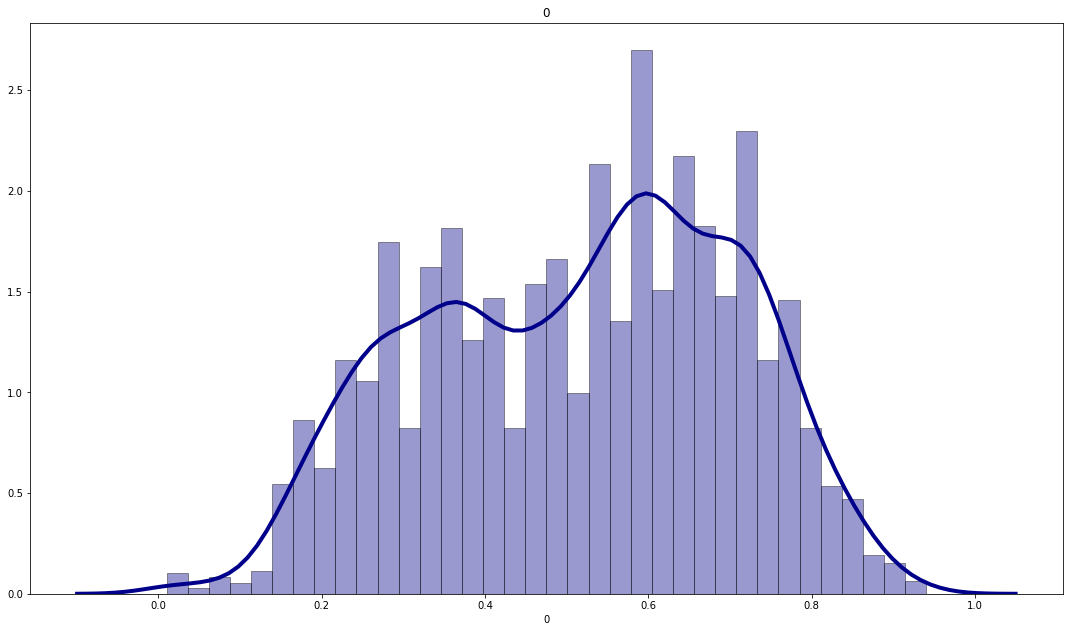

	*****
0    2629
1    1143
Name: 1, dtype: int64


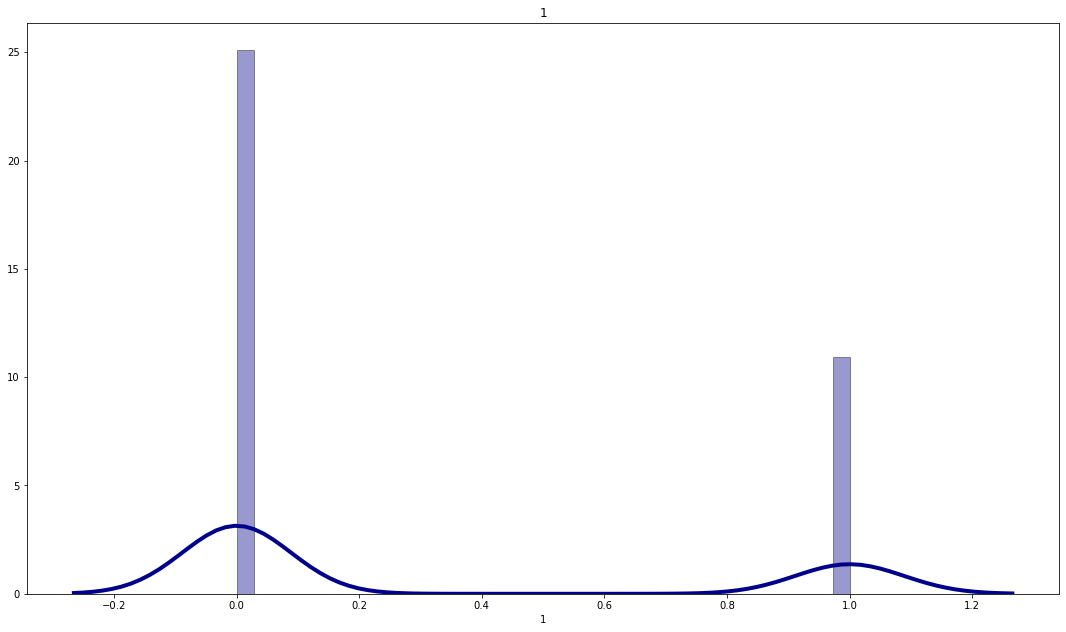

	*****
0    3307
1     465
Name: 2, dtype: int64


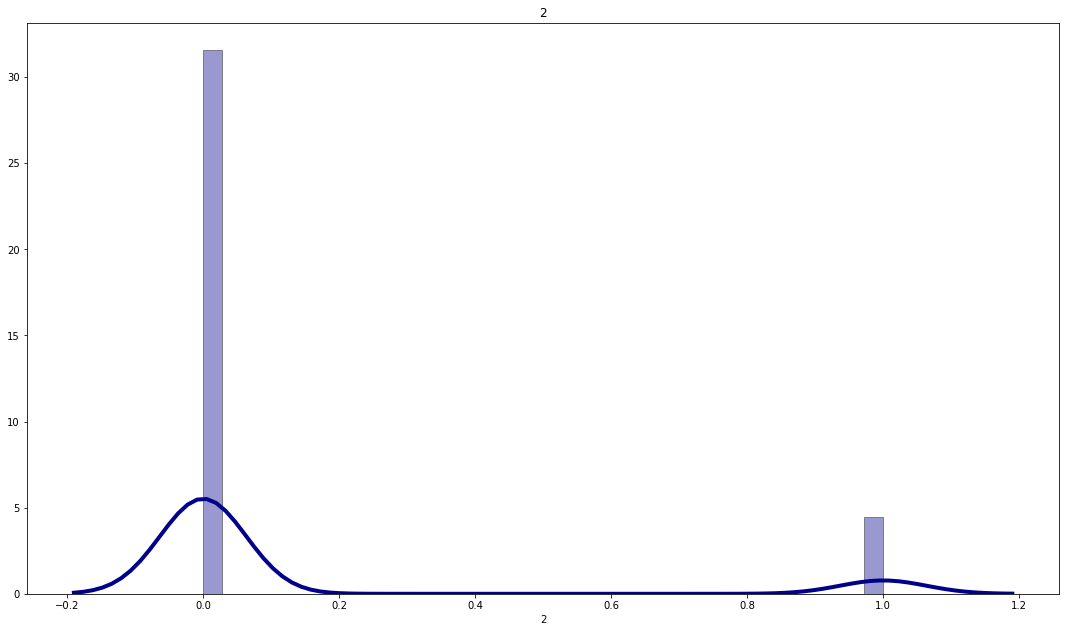

	*****
0    3723
1      49
Name: 3, dtype: int64


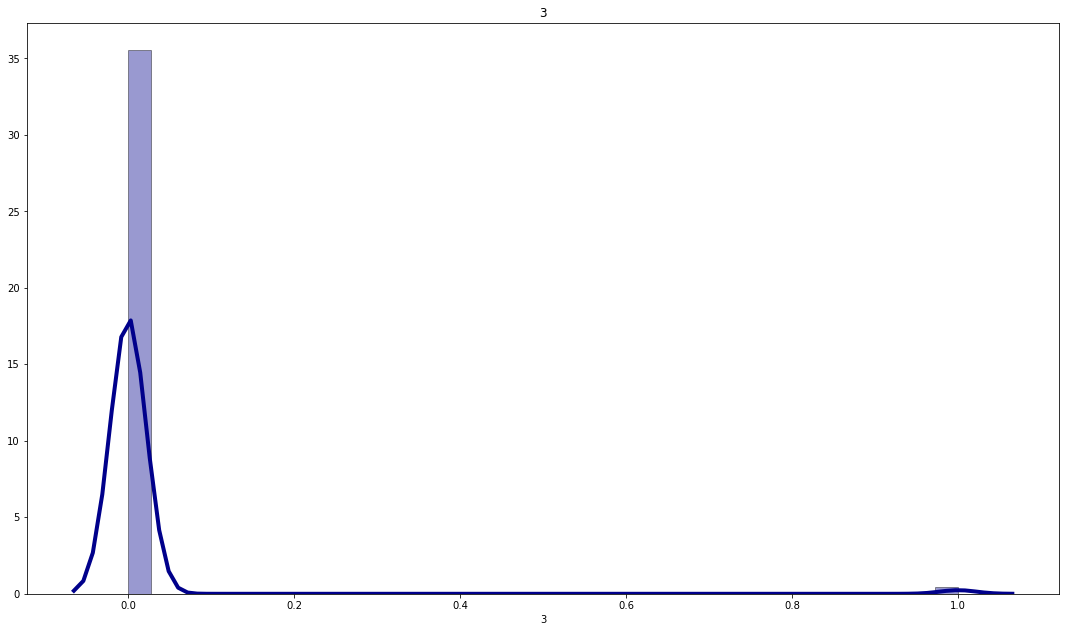

	*****
0    3729
1      43
Name: 4, dtype: int64


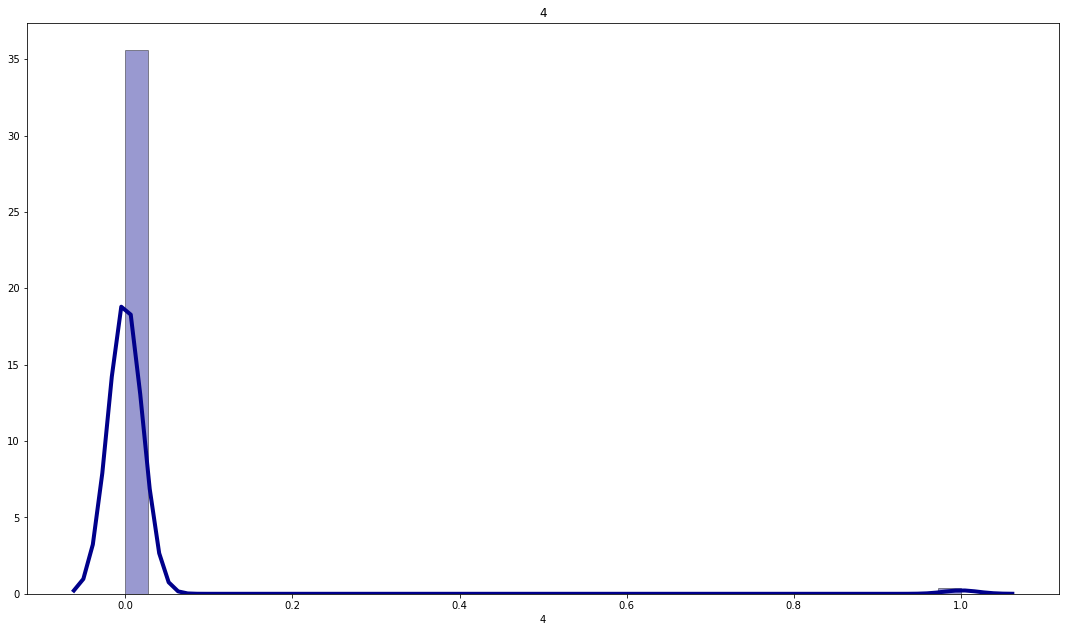

	*****
0    3627
1     145
Name: 5, dtype: int64


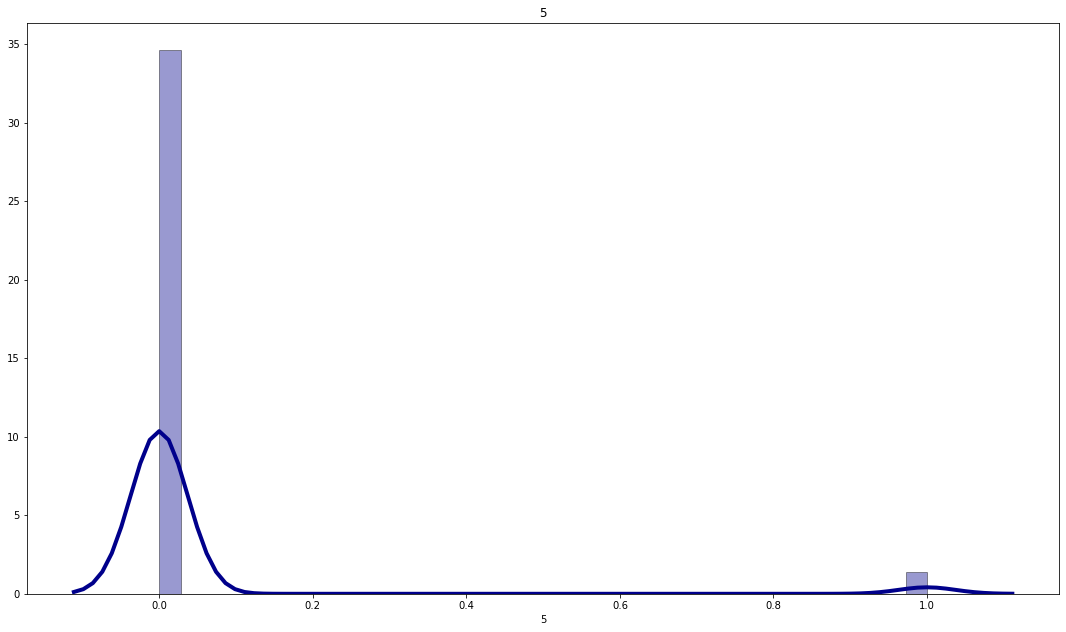

	*****
0    3719
1      53
Name: 6, dtype: int64


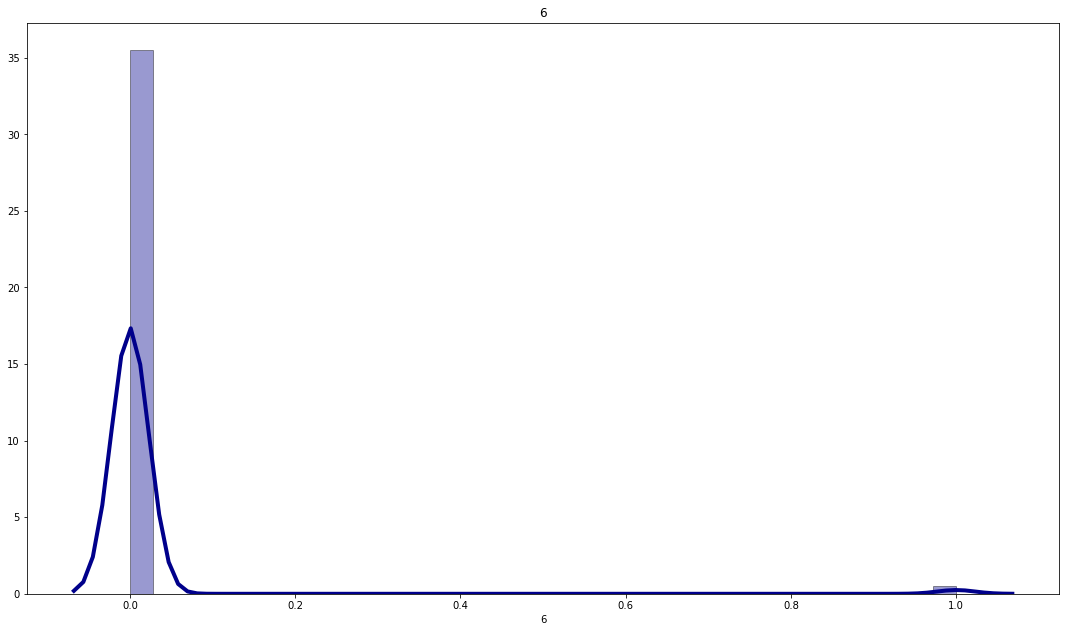

	*****
0    3718
1      54
Name: 7, dtype: int64


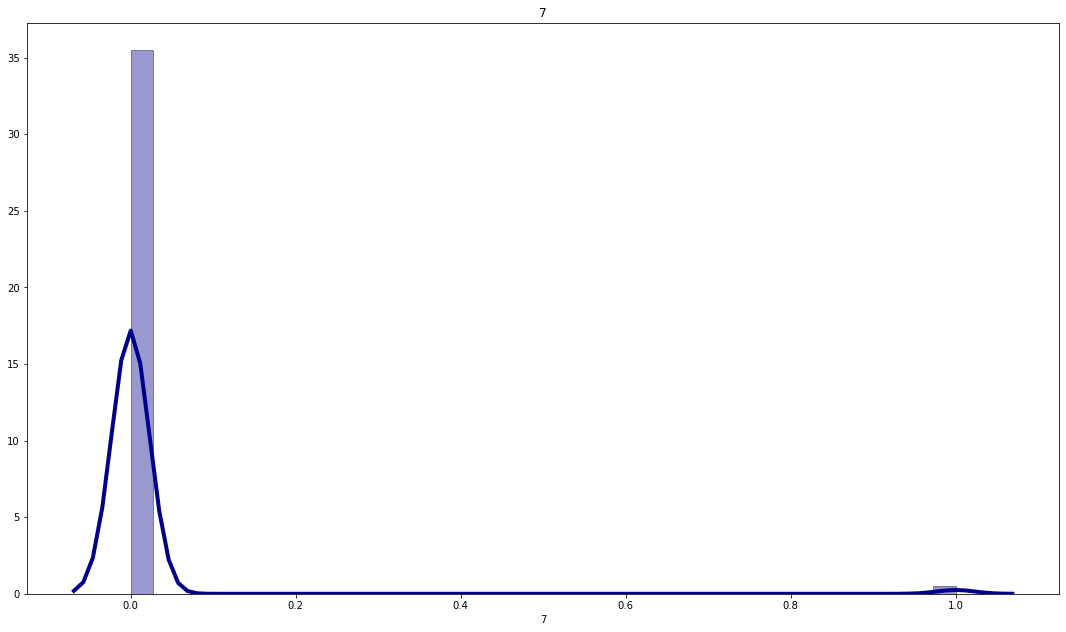

	*****
0    3715
1      57
Name: 8, dtype: int64


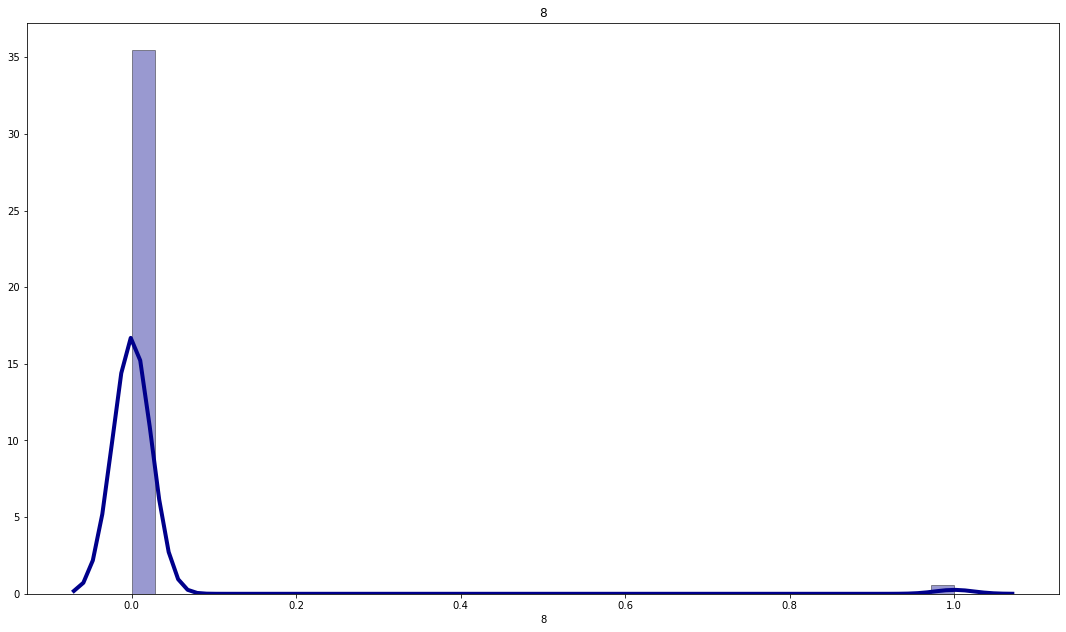

	*****
0    3538
1     234
Name: 9, dtype: int64


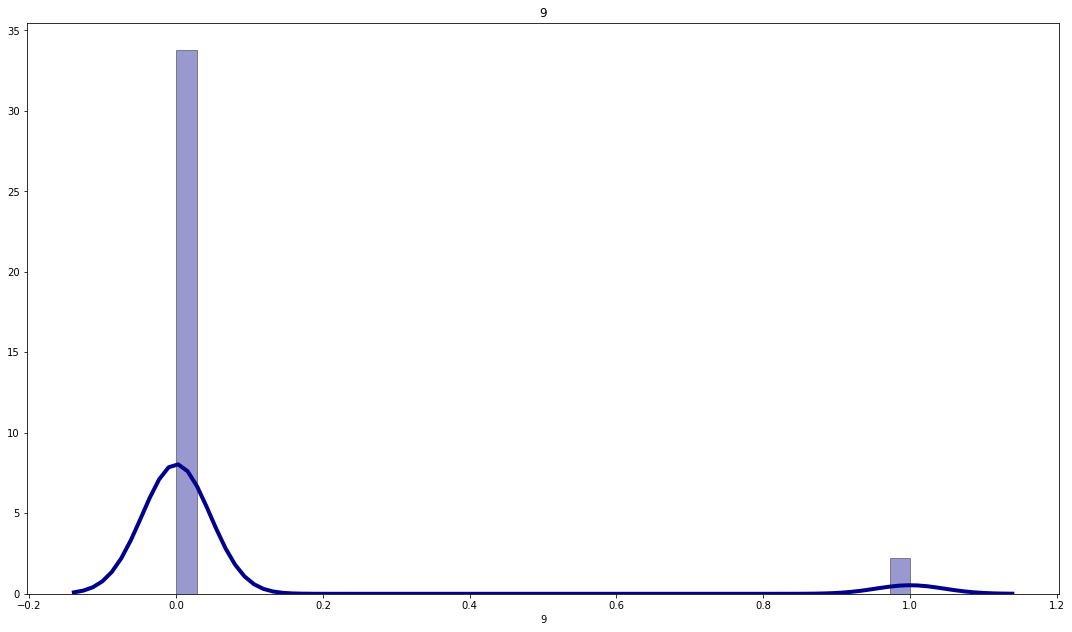

	*****
0    3540
1     232
Name: 10, dtype: int64


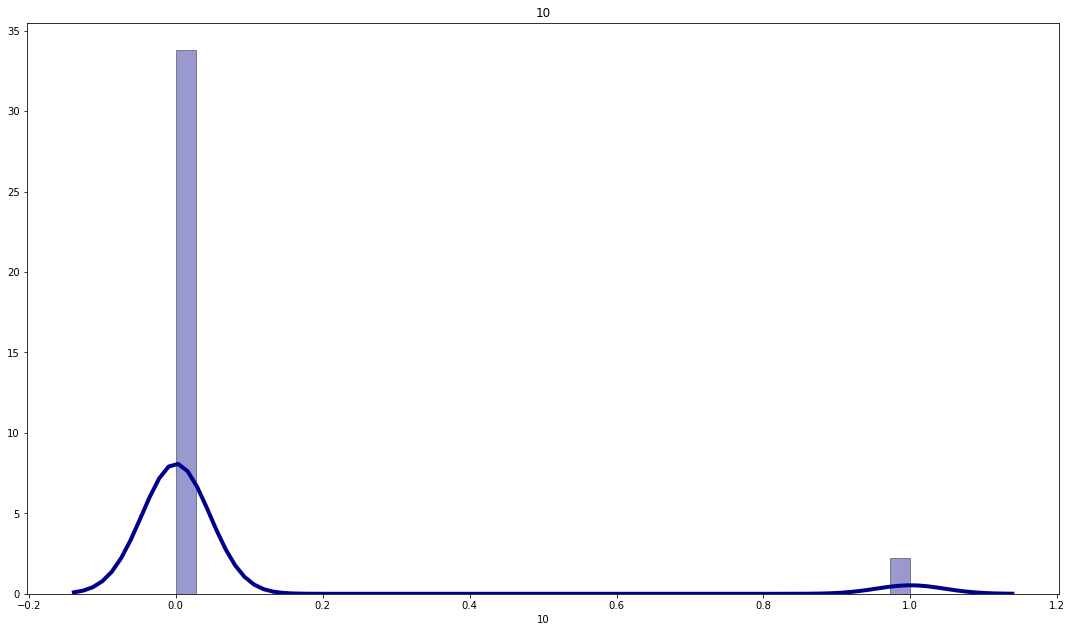

	*****
0    3753
1      19
Name: 11, dtype: int64


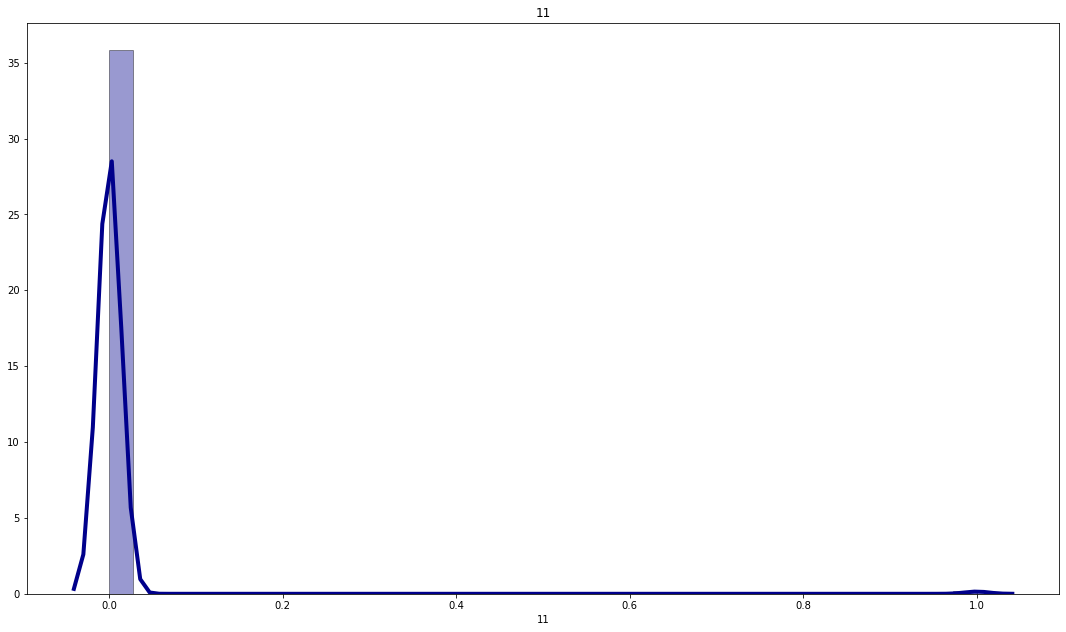

	*****
0    3739
1      33
Name: 12, dtype: int64


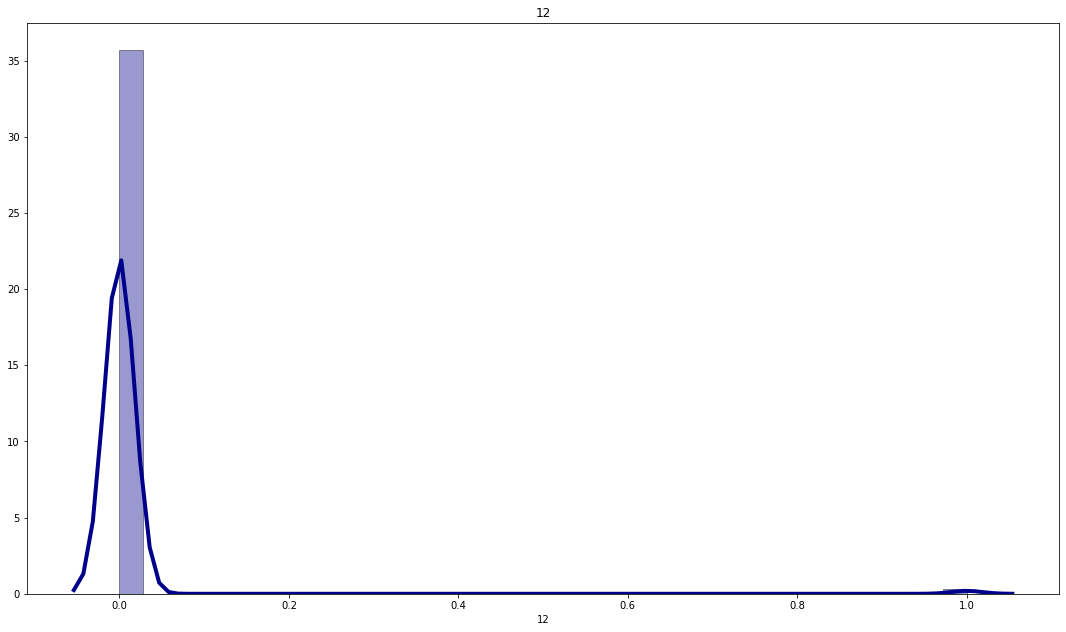

	*****
0    3677
1      95
Name: 13, dtype: int64


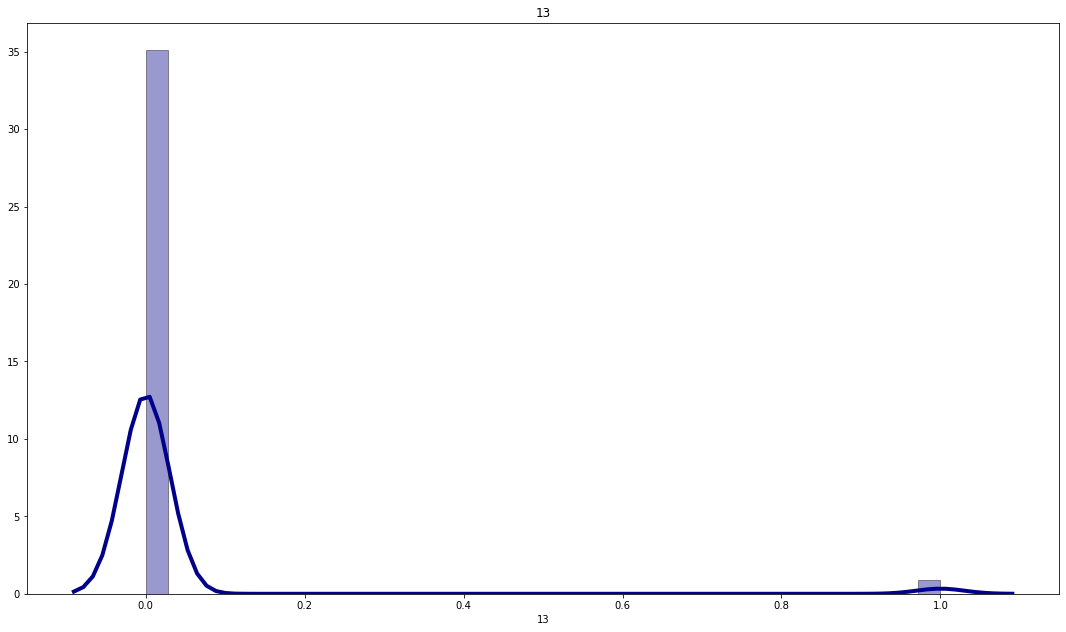

	*****
0    3771
1       1
Name: 14, dtype: int64


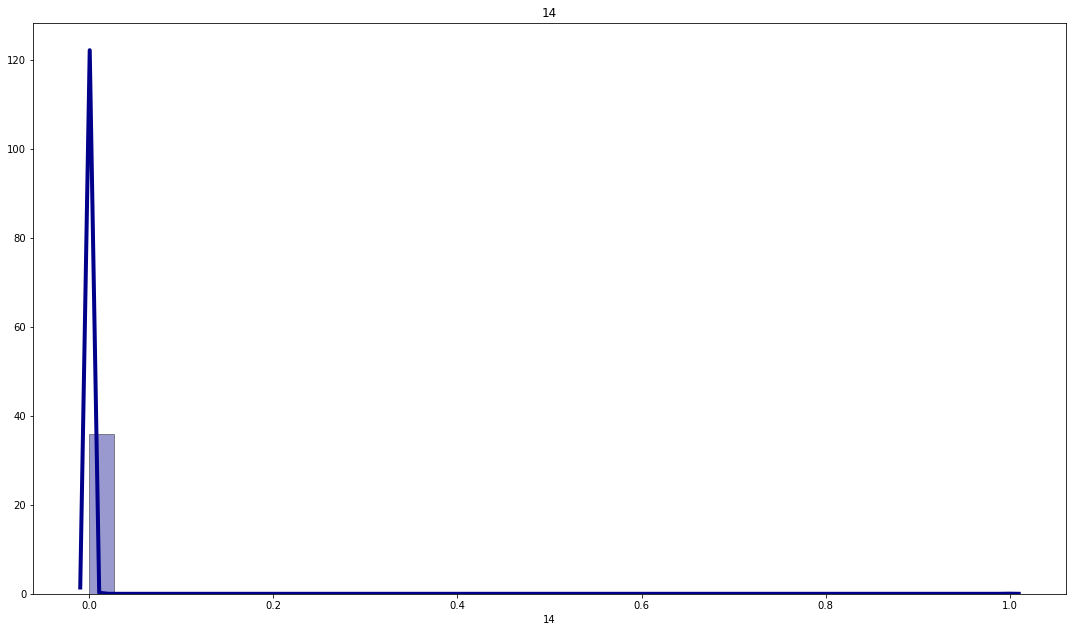

	*****
0    3586
1     186
Name: 15, dtype: int64


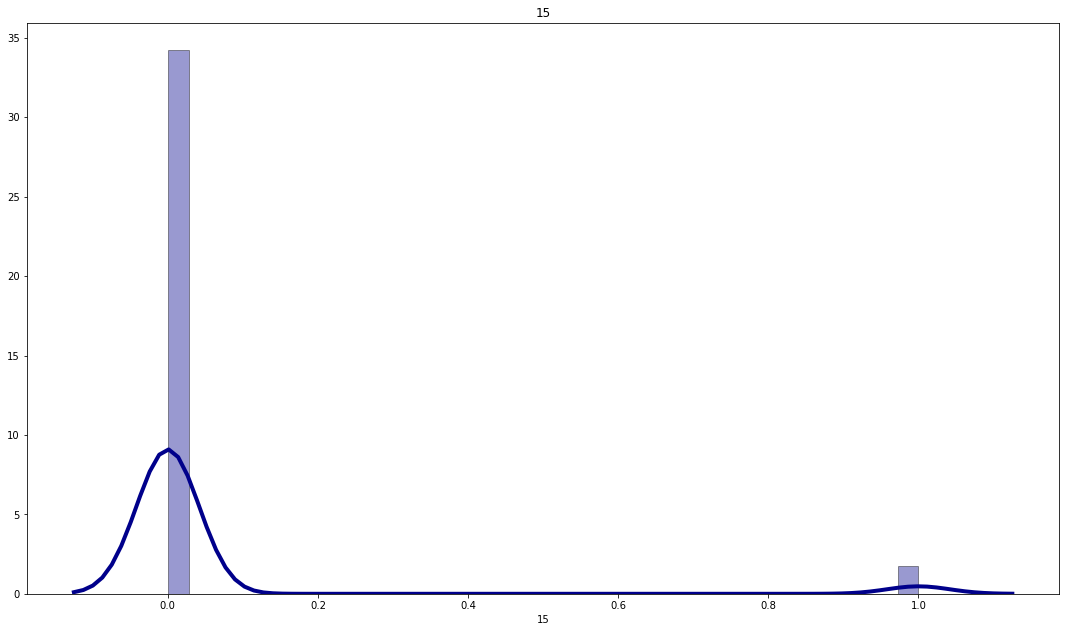

	*****


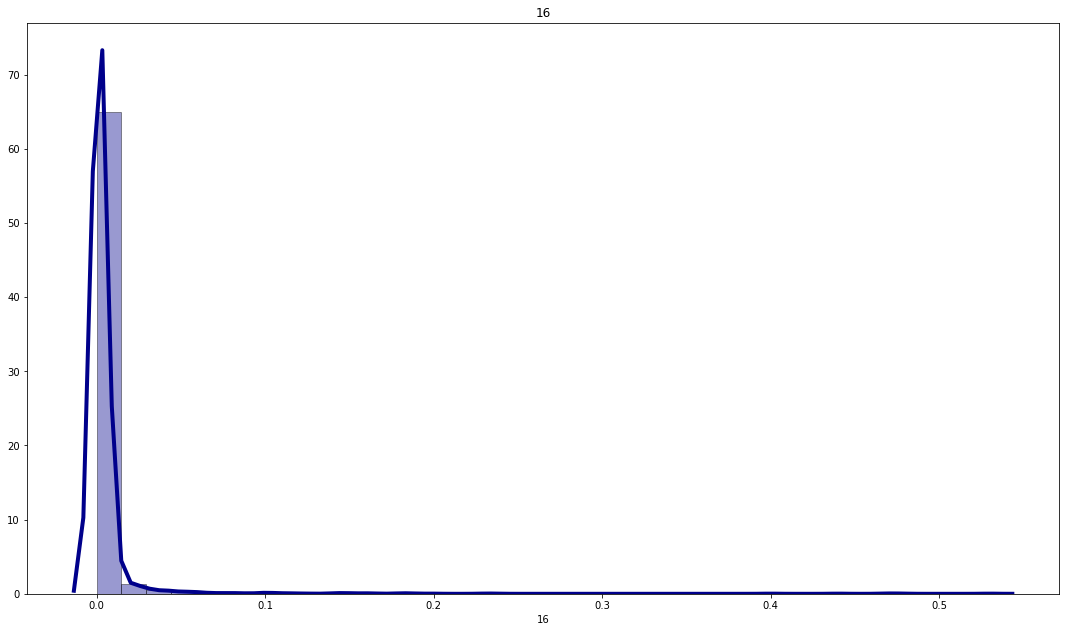

	*****


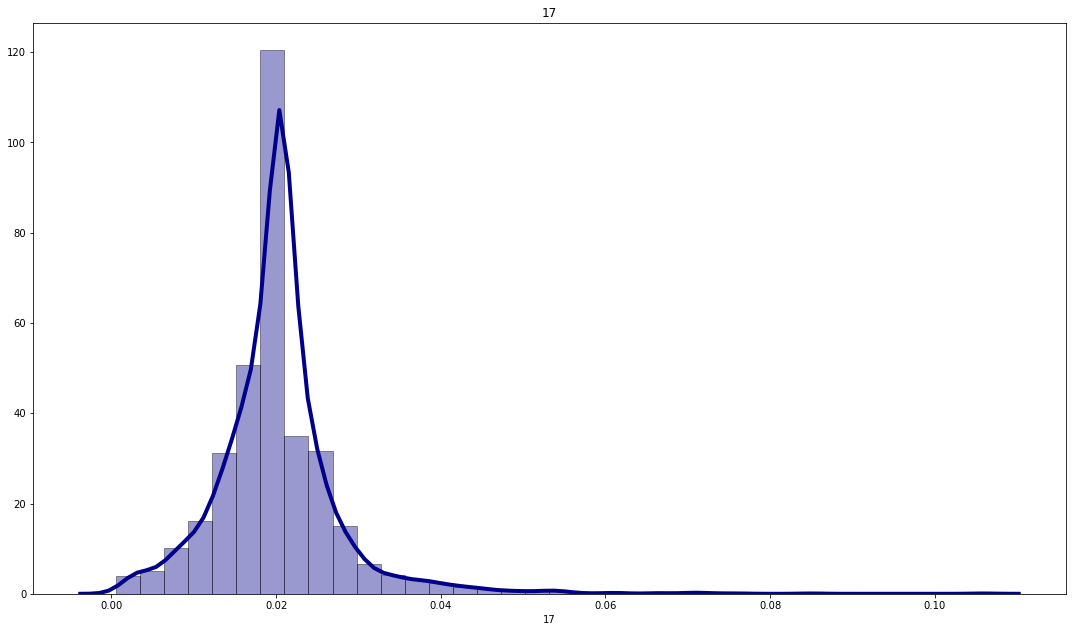

	*****


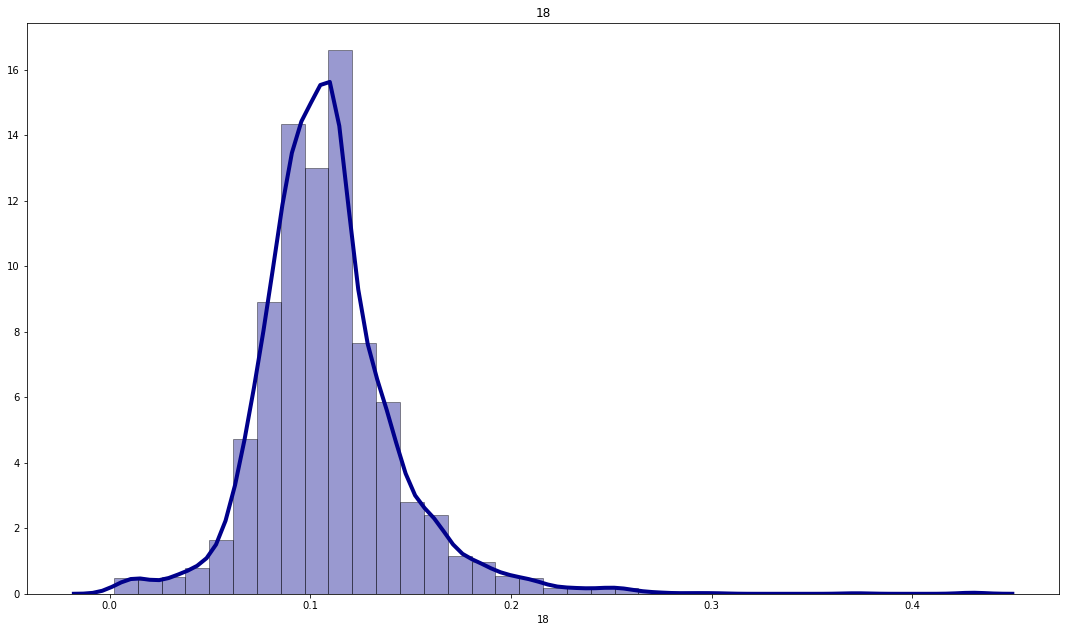

	*****


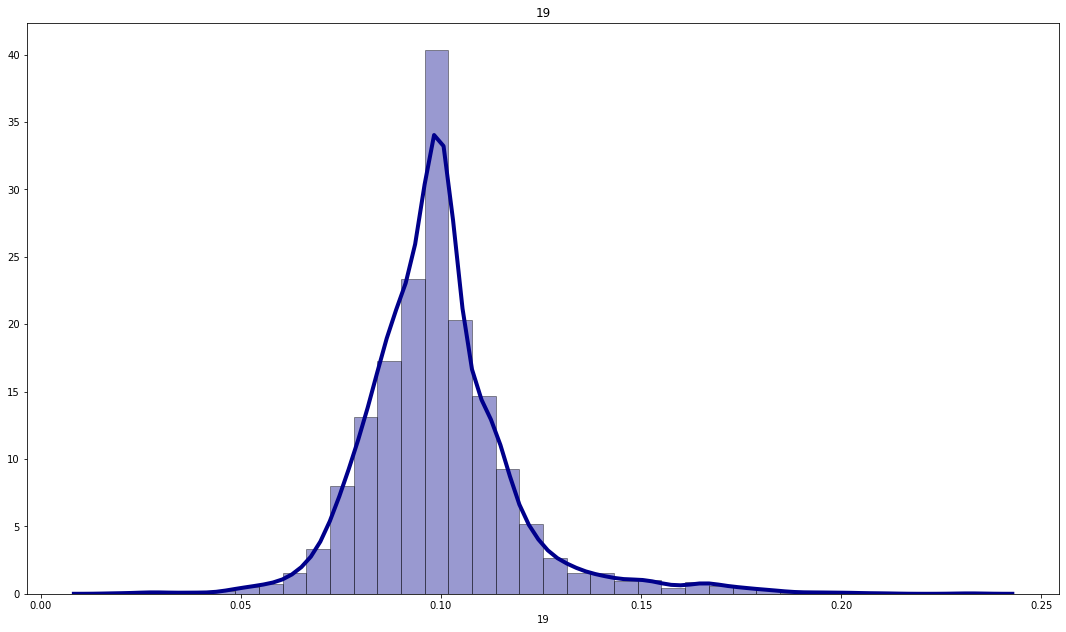

	*****


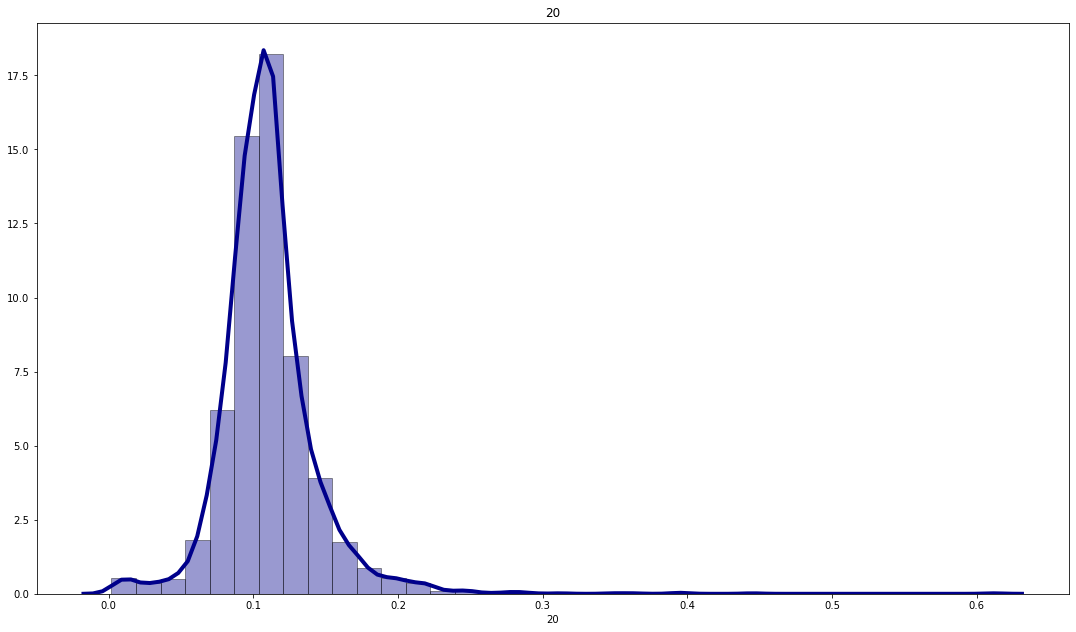

	*****
3    3488
2     191
1      93
Name: 21, dtype: int64


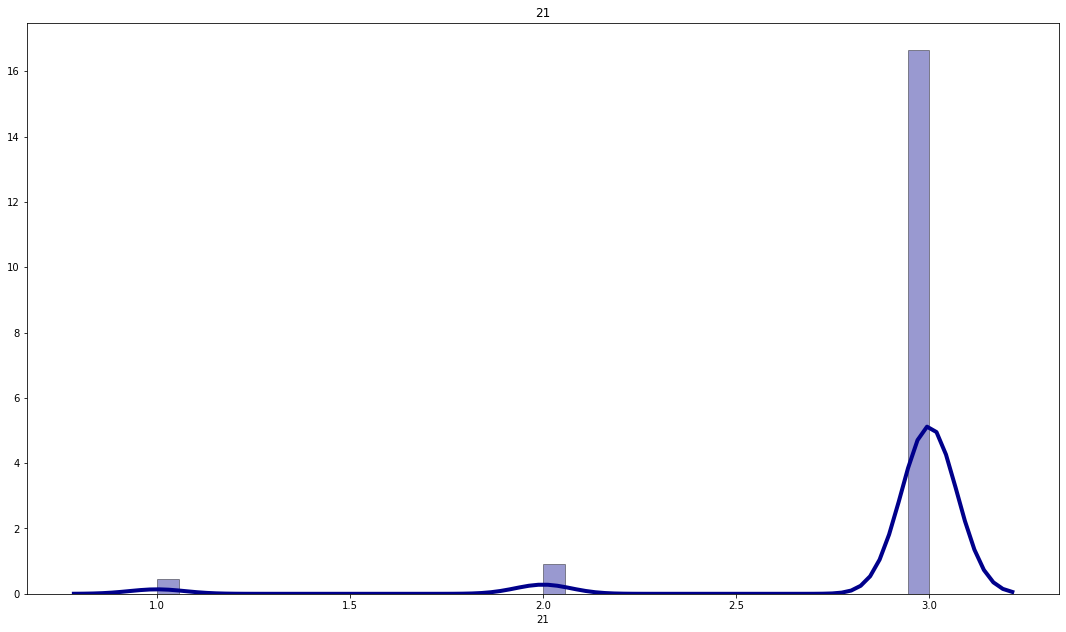

	*****


In [7]:
print('Number columns: ', train_data.shape[1])
print('Columns with NAN values: ', 
      train_data.columns[(train_data.isnull().sum()>0).tolist()]
     )
print('---------Exploring All Columns-----------\n\n')

for column_name in train_data.columns:
    if train_data[column_name].dtype == 'int64':
        print(train_data[column_name].value_counts())
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    # Density Plot and Histogram of all arrival delays
    sns.distplot(train_data[column_name], hist=True, kde=True, 
                 bins=int(180/5), color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4})    
    plt.title(column_name)
    plt.show()
    print('\t*****')

### Pairwise plots

In [8]:
std = train_data.iloc[:, :-1].std()
median = train_data.iloc[:, :-1].quantile(0.5)
std_median = pd.DataFrame(std, 
                          columns = ['standard_dev']
                         ).join(pd.DataFrame(median), how = 'outer', rsuffix = 'median')
std_median

,standard_dev,0.5
0,0.189525,0.5400
1,0.459626,0.0000
2,0.328798,0.0000
3,0.113248,0.0000
4,0.106174,0.0000
5,0.192284,0.0000
6,0.117716,0.0000
7,0.118806,0.0000
8,0.122012,0.0000
9,0.241253,0.0000


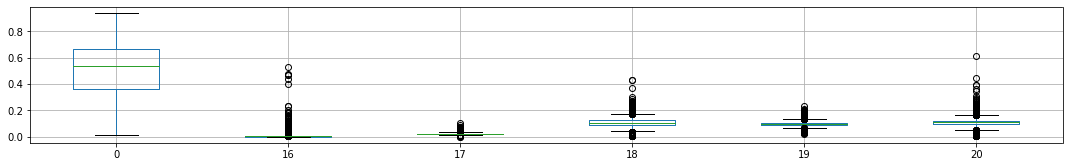

In [9]:
fig = plt.gcf()
fig.set_size_inches(18.5, 2.5)
non_boolean_columns_x=[column for column in train_data.iloc[:, :-1].columns if train_data[column].unique().shape[0]>2]
train_data[non_boolean_columns_x].boxplot()

Column 0 has a lot of variance in comparison to the other columns(remeber the scale of comparison is small). We will need to standardize the data when modelling it- based on the classification technique being used. Random forests will not need normalization. But, SVM will. We will also have to visualize the decision boundary. IS it linear?


<!-- 1. Changing Categorical to numerical
This will also require handling missing values  -->

## Correlations 

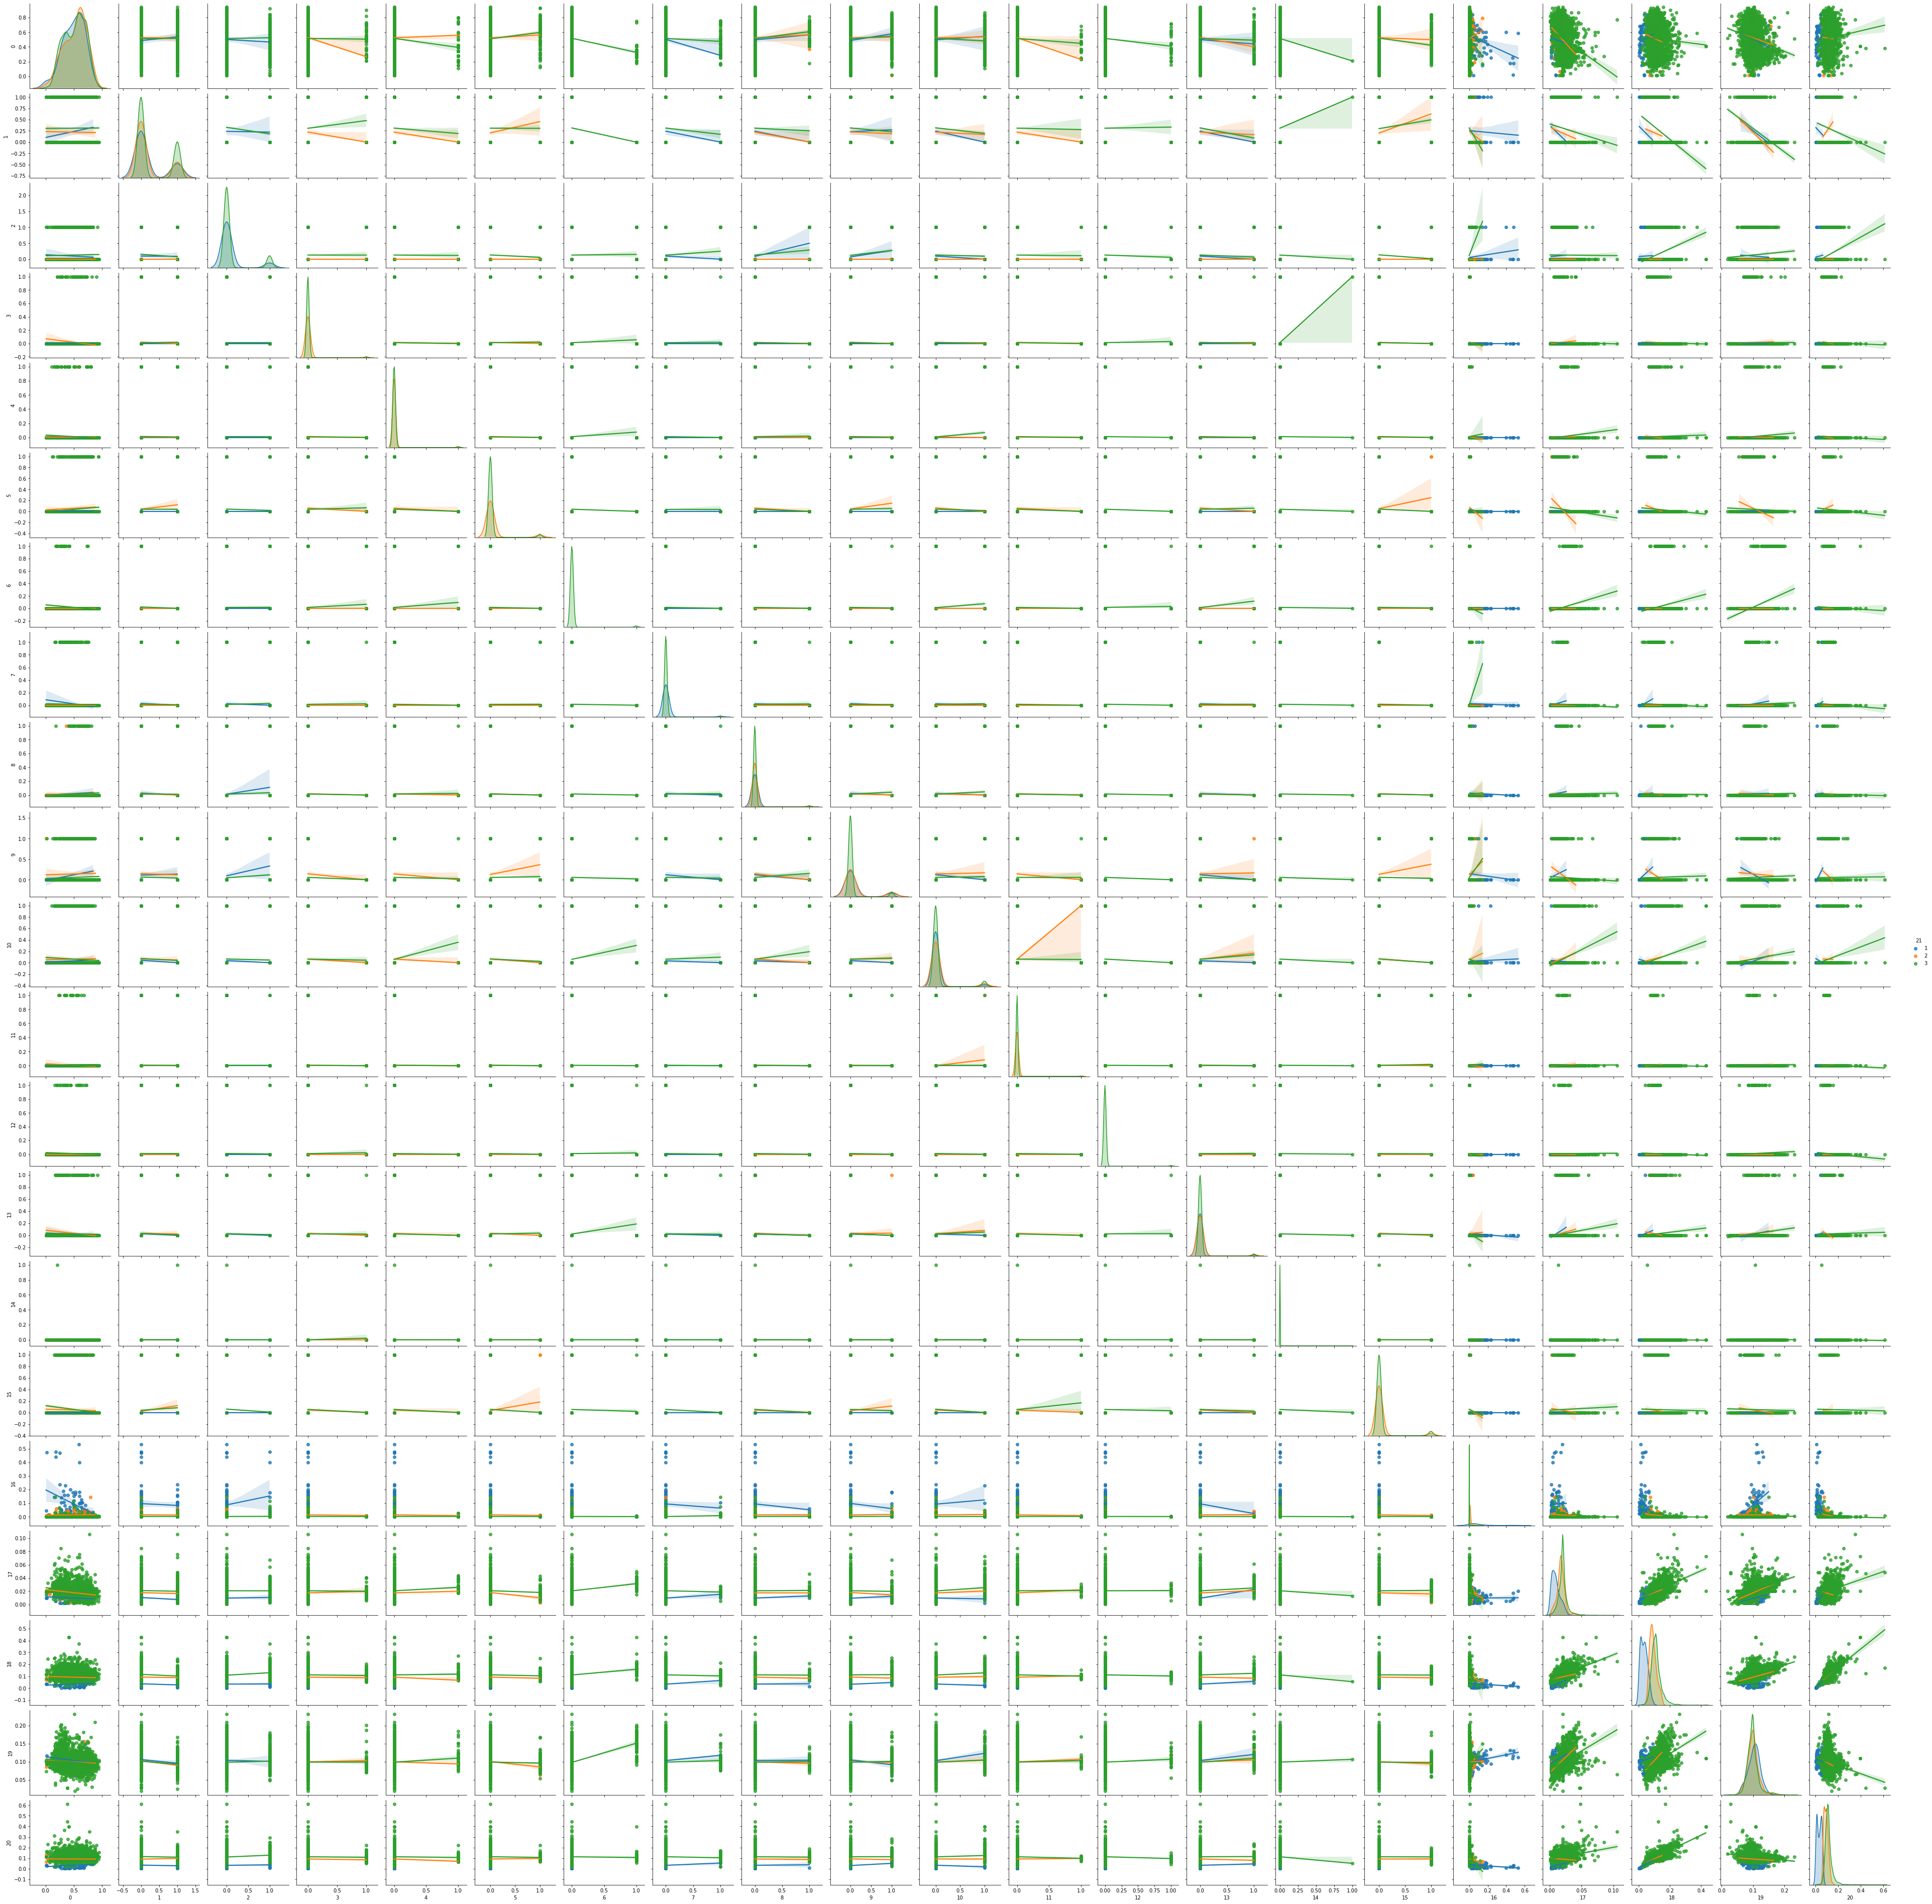

In [10]:
sns.pairplot(train_data, hue = 21, kind="reg")
plt.show()

Because we have binary variables. Let us caculate the Jaccard and kulsinski similarity

In [11]:
from scipy.spatial.distance import jaccard, kulsinski

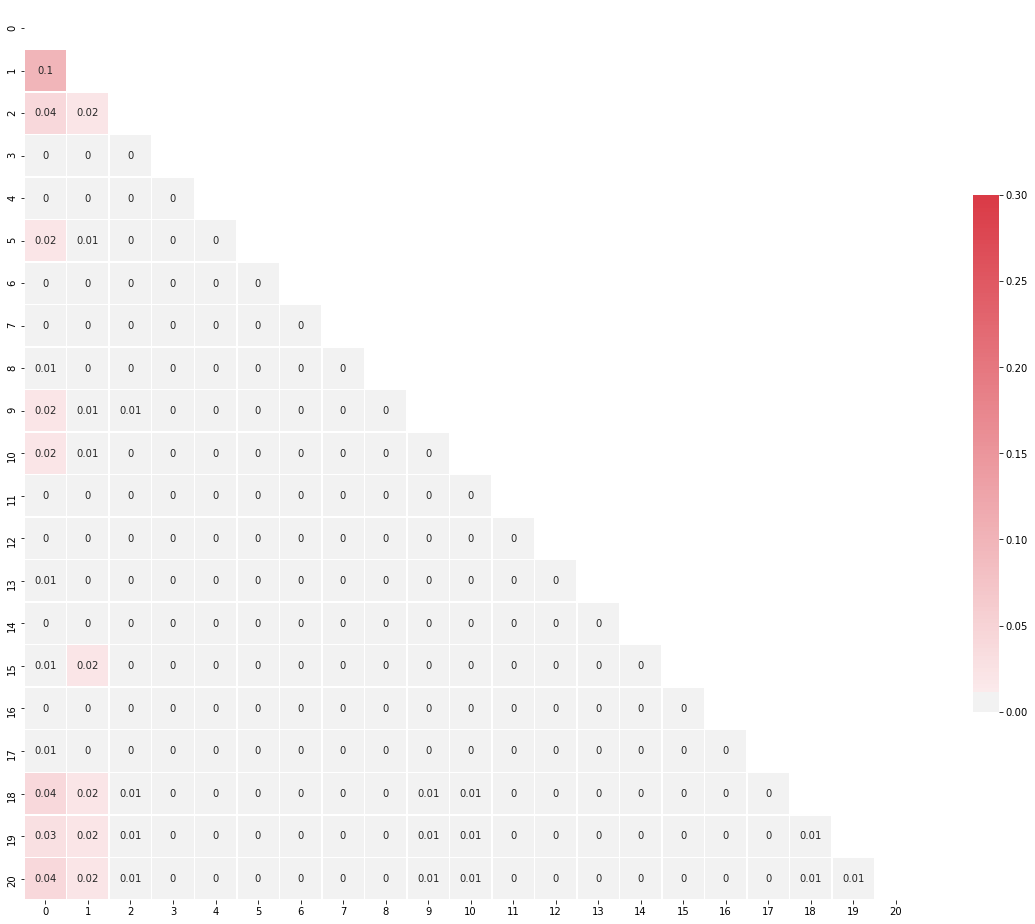

In [12]:
# Compute the correlation matrix
def kulsinski_corr(array_1, array_2):
    difference = kulsinski(array_1, array_2)
    return round(1.0 - difference, 2)

corr = train_data.iloc[:, :-1].corr(method = kulsinski_corr)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 19))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

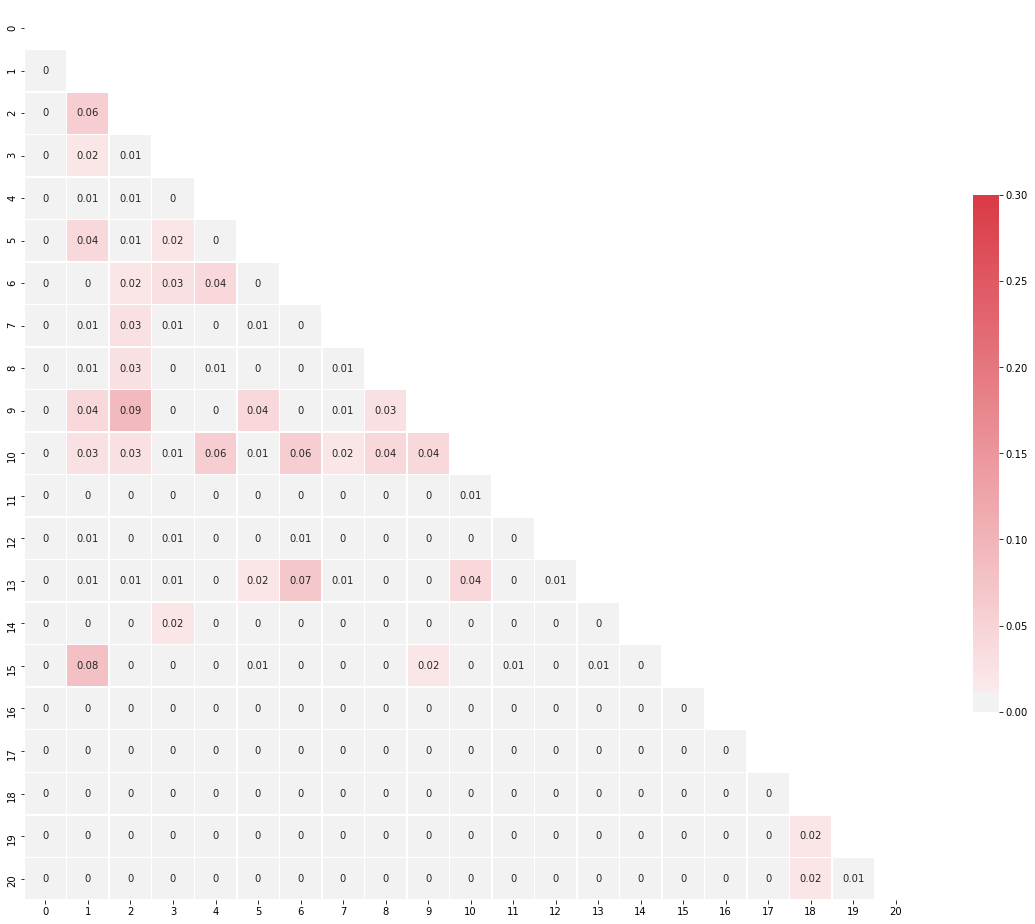

In [13]:
def jaccard_corr(array_1, array_2):
    difference = jaccard(array_1, array_2)
    return round(1.0 - difference, 2)

corr = train_data.iloc[:, :-1].corr(method = jaccard_corr)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 19))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Pipeline

### Simple built in structures

In [14]:
from sklearn.metrics import confusion_matrix, auc, accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

def custom_scorer(model_, x_train, y_train, x_test, y_test):
    """
    Generate model validation metrics
    args: 
      model_:    classification model being analyzed
      x_train:   features of training sample
      y_train:   labels of training sample
      x_test:    features of test set
      y_test:    true label of the data, with shape (nsamples,)
    """
    print("Train Score:", model_.score(x_train, y_train))
    print("Test Score:", model_.score(x_test, y_test))
    y_pred = model_.predict(x_test)
    labels = model_.classes_
    print("F1 Score: ", f1_score(y_test, y_pred, average="macro"))
    print("Precision Score: ", precision_score(y_test, y_pred, average="macro"))
    print("Recall Score: ", recall_score(y_test, y_pred, average="macro")) 

    cm = confusion_matrix(y_test, y_pred, labels = labels)
    print("Confusion Matrix:\n", cm)
    confusion_matrix_display(y_test, y_pred, labels, ymap=None, figsize=(5,5))
    
def confusion_matrix_display(y_true, y_pred, labels, ymap=None, figsize=(10, 10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap = "Greens")
    plt.show()

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

estimators = [('reduce_dimension', PCA()), 
             ('classifier', RandomForestClassifier())
             ]
pipe = Pipeline(estimators)

##For param grid values write the name of the "pipe step" followed by 2 '_' and then the hyperparameter to optimize. 
param_grid = dict(reduce_dimension__n_components=[10, 14, 17, 20, 21], 
                  classifier__n_estimators = [100, 200, 300, 150, 250], 
                  classifier__min_samples_split= [4, 8, 16])

grid_search = GridSearchCV(pipe, param_grid=param_grid, cv = 5)


In [16]:
print(pipe)
print(grid_search)

Pipeline(steps=[('reduce_dimension', PCA()),
                ('classifier', RandomForestClassifier())])
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('reduce_dimension', PCA()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__min_samples_split': [4, 8, 16],
                         'classifier__n_estimators': [100, 200, 300, 150, 250],
                         'reduce_dimension__n_components': [10, 14, 17, 20,
                                                            21]})


In [17]:
grid_search.fit(train_data.iloc[:, :-1]
              , train_data.iloc[:, -1])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('reduce_dimension', PCA()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__min_samples_split': [4, 8, 16],
                         'classifier__n_estimators': [100, 200, 300, 150, 250],
                         'reduce_dimension__n_components': [10, 14, 17, 20,
                                                            21]})

Tuned Model Parameters: {'classifier__min_samples_split': 4, 'classifier__n_estimators': 100, 'reduce_dimension__n_components': 20}
Train Score: 0.9986744432661718
Test Score: 0.941656942823804
F1 Score:  0.6164398589748418
Precision Score:  0.8554586320524052
Recall Score:  0.6035123124084951
Confusion Matrix:
 [[  55    2   16]
 [   0   11  166]
 [  16    0 3162]]


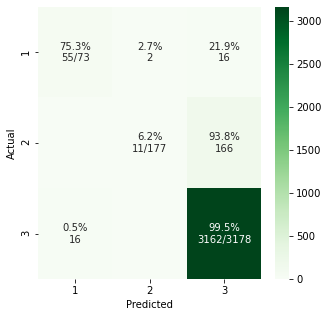

In [18]:
# Compute and print metrics
print("Tuned Model Parameters: {}".format(grid_search.best_params_))
custom_scorer(grid_search
             , train_data.iloc[:, :-1]
              , train_data.iloc[:, -1]
              , test_data.iloc[:, :-1]
              , test_data.iloc[:, -1])

### Setting custom steps to the pipeline

Points to note:
Difference between Normalizer and standard scaler
The StandardScaler assumes your data is normally distributed within each feature. By "removing the mean and scaling to unit variance", you can see in the picture now they have the same "scale" regardless of its original one.

Normalizer() rescales each sample. For example rescaling each company's stock price independently of the other.
StandardScaler() standardizes features (such as the features of the person data i.e height, weight)by removing the mean and scaling to unit variance.


#### What if we want some custom trasnformations on certain columns and have a function which you want to call instead? 
The ColumnTransformer is a class in the scikit-learn that allows the selective application of data preparation transforms. It will take the column names on which transformations are to be performed, and the transformers themselves. Param "remainder" specifies what to do with the rest of the columns not mentioned. 

ColumnTransformer applies each transformation sequentially

Tuned Model Parameters: {'pca__n_components': 10, 'random_forest__min_samples_split': 4, 'random_forest__n_estimators': 300}
Train Score: 1.0
Test Score: 0.9439906651108518
F1 Score:  0.6394118818991325
Precision Score:  0.8648968492692858
Recall Score:  0.6150215229769157
Confusion Matrix:
 [[  55    3   15]
 [   0   17  160]
 [  14    0 3164]]


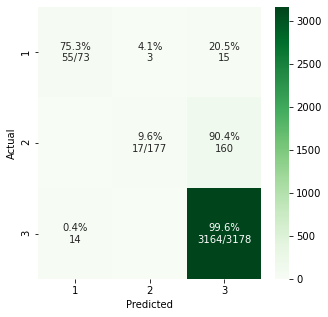

In [59]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


def get_number_features_present(data_X):
    '''
    Determines if all features are greater than 1, then sums them
    Input: 
        data_X: DataFrame with the features
    Returns:
        data_X: original Input dataframe with an additional column allvalues_gt1
    '''
    new_df = pd.DataFrame(data_X).copy(deep=True)
    new_df['allvalues_gt1'] = new_df.gt(1).sum(axis=1)
    return new_df
    
    
non_boolean=[column for column in train_data.iloc[:, :-1].columns if train_data.iloc[:, :-1][column].unique().shape[0]>2]
bool_columns = [col for col in train_data.iloc[:, :-1].columns if col not in non_boolean]

non_bool_transformer = ColumnTransformer(transformers=[
                        ('impute_numeric_missing', SimpleImputer(strategy='median'), non_boolean),
                        ('numeric_transformer', StandardScaler(), non_boolean)
                                                    ], 
                                remainder = 'passthrough'
                               )
create_new_col_transformer = FunctionTransformer(get_number_features_present, validate = False)


## OR you could have called make_column_transformer
# make_column_transformer(
#     (non_boolean, make_pipeline(SimpleImputer(strategy='median'), StandardScaler())),
#     (bool_columns, BoolColumnProcess()))

model_pipeline = Pipeline(steps=[ 
                                 ('function_new_col', create_new_col_transformer),
                                 ('non_bool_transformer',non_bool_transformer),
                                 ('pca', PCA()),
                                 ('random_forest', RandomForestClassifier(random_state = 20))
                                 ]
                         )
param_grid_model_pipeline = dict(pca__n_components=[10, 14, 17, 20, 21], 
                  random_forest__n_estimators = [100, 200, 300, 150, 250], 
                  random_forest__min_samples_split= [4, 8, 16]
                 )

grid_search_model = GridSearchCV(model_pipeline, param_grid=param_grid_model_pipeline, cv = 5)
grid_search_model.fit(train_data.iloc[:, :-1]
              , train_data.iloc[:, -1])
# Compute and print metrics
print("Tuned Model Parameters: {}".format(grid_search_model.best_params_))
custom_scorer(grid_search_model
             , train_data.iloc[:, :-1]
              , train_data.iloc[:, -1]
              , test_data.iloc[:, :-1]
              , test_data.iloc[:, -1])

#### Let's go even a step further and say we don't even want to select the columns in advance. Instead, we need the pipeline to do the selection for us

Let us now introduce FeatureUnion- It concatenates the results of multiple transformations happening in parallel

Tuned Model Parameters: {'pca__n_components': 10, 'random_forest__min_samples_split': 4, 'random_forest__n_estimators': 300}
Train Score: 1.0
Test Score: 0.9932905484247374
F1 Score:  0.9604748556329508
Precision Score:  0.9386188167699075
Recall Score:  0.9842036144612935
Confusion Matrix:
 [[  70    1    2]
 [   0  177    0]
 [  10   10 3158]]


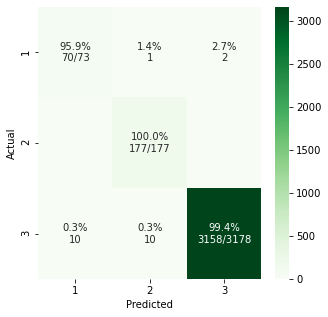

In [58]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Extends the BaseEstimator and TransformerMixin classes. 
    Selects columns in the pipeline based on column names
    """
    def __init__(self, cols):
        self._cols = cols

    def fit(self, data_X, y=None):
        return self

    def transform(self, data_X, y=None):
        return data_X[self._cols]

numeric_cols=[column for column in train_data.iloc[:, :-1].columns if train_data.iloc[:, :-1][column].unique().shape[0]>2]
non_numeric_cols = [col for col in train_data.iloc[:, :-1].columns if col not in non_boolean]


class NonNumericProcessor(BaseEstimator, TransformerMixin):
    """
    Dummifies columns passed to it
    """
    def __init__(self):
        return None
    
    def fit(self, data_X, y=None):
        cats = {}
        for col in data_X.columns:
            cats[col] = set(data_X[col].unique())
        self.categoricals = cats    
        return self    

    def transform(self, data_X, y=None):
        df = data_X.copy(deep=True).astype('category')
        for column in df.columns:
            df[column] = pd.Categorical(df[column], categories=self.categoricals[column])
        new_df = pd.get_dummies(df, drop_first=True)
        self.columns = new_df.columns
        return new_df
    
def get_number_features_present(data_X):
    '''
    Determines if all features are greater than 1, then sums them
    Input: 
        data_X: DataFrame with the features
    Returns:
        data_X: original Input dataframe with an additional column allvalues_gt1
    '''
    new_df = pd.DataFrame(data_X).copy(deep=True)
    new_df['allvalues_gt1'] = new_df.gt(1).sum(axis=1)
    return new_df

transformer = Pipeline([('features', FeatureUnion(transformer_list=[
                                                ('numericals', Pipeline([
                                                               ('select_numerical', ColumnSelector(numeric_cols)),
                                                               ('impute_numerical', SimpleImputer(strategy='median')),
                                                               ('scale_numerical', StandardScaler()),
                                                                        ])
                                                ), 
                                                ('booleans', Pipeline([
                                                                    ('select_boolean', ColumnSelector(non_numeric_cols)),
                                                                    ('impute_bools', NonNumericProcessor()),
                                                                    ])
                                                )
                                                                ]
                                                 )
                 ),
])



create_new_col_transformer = FunctionTransformer(get_number_features_present, validate = False)

model_pipeline_union = Pipeline([ ('transformer',transformer),
                           ('function_new_col', create_new_col_transformer), 
                             ('random_forest', RandomForestClassifier(random_state = 20))
                        ]
                         )
model_pipeline_union.fit(train_data.iloc[:, :-1]
              , train_data.iloc[:, -1])
# Compute and print metrics
print("Tuned Model Parameters: {}".format(grid_search_model.best_params_))
custom_scorer(model_pipeline_union
             , train_data.iloc[:, :-1]
              , train_data.iloc[:, -1]
              , test_data.iloc[:, :-1]
              , test_data.iloc[:, -1])
